In [2]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t, n, k, d = symbols( 't n k d' )
init_printing(use_unicode=True)

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(N.i + N.j)

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

def P12(n, k):
    return Vector.zero

def P23(n, k):
    return n*(k+1)*N.i

def P34(n, k):
    return n*N.i + n*N.j

def P14(n, k):
    return n*N.j

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:

def Sum12(n,k):
    return f(P12(n,k), v1, v2 )

def Sum23(n,k):
    return f(P23(n,k), -v1, -k*v1 + v2 )

def Sum34(n,k):
    return f(P34(n,k), -v1 , k*v1 - v2 )

def Sum14(n,k):
    return f(P14(n,k), v1 , -v2 )

def Sum(n,k):
    return Sum12(n,k) + Sum23(n,k) + Sum34(n,k) + Sum14(n,k)    

# Take the limit as t -> 0 to get the Euler characteristic(?)

def EulerCalculation(n,k):
    return limit(Sum(n,k),t,0)


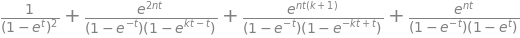

In [12]:
Sum(n,k)

In [14]:
simplify(EulerCalculation(n,k)) # Letting t -> 0  to obtain the Euler characteristic (n.b. degree-0 term in a is equal to lattice point count for CP2's polytope)

In [17]:
factor(simplify(EulerCalculation(n,k)))

In [8]:
def Euler(k,a):
    return simplify( Rational(1,4) * ( (a+1)*(a+2)*(a+k+1)*(a+k+2) ) )

In [9]:
Euler(k,a)

In [10]:
Euler(k,0) # The usual formula for the number of lattice points in the dilated 2-simplex

In [12]:
Euler(3,0)

In [13]:
Euler(3,1)

In [15]:
Euler(3,3)

In [14]:
def Delta12(n,d):
    return factor(Rational(1,12)*d*(d+1)*(2*d + 1) - Rational(1,2)*(d+1))

Delta12(n,d)

In [9]:
def Delta1(n,d):
    return factor(n*(d+1) + Rational(1,6)*d*(d+1)*(2*d+1) + (d+1))

Delta1(n,d)

In [11]:
def DeltaEmpty(n,d):
    return factor(Rational(1,2)*(d+1)*(n+1)*(n+2))

DeltaEmpty(n,d)

In [16]:
def Sum(n,d):
    return factor( 3*Delta12(n,d) + 3*Delta1(n,d) + DeltaEmpty(n,d) )

Sum(n,d)

In [18]:
Sum(n,0)